In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [22]:
text_x_src_path = '../../Dataset/mixed_text_assignment.json'
numb_x_src_path = '../../Dataset/MixedDataSet.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [23]:
text_data = pd.read_json(text_x_src_path)
numb_data = pd.read_json(numb_x_src_path)

In [24]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [25]:
texts = text_data.iloc[:, :].astype(str).values.tolist()

texts = [[element if element != 'None' else '' for element in sublist] for sublist in texts]

In [26]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>") 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_sequence_len = max([len(seq) for seq in sequences])
data_vectorized = pad_sequences(sequences, maxlen=max_sequence_len)

In [27]:
X_T = data_vectorized
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [28]:
X_T_train, X_T_test, y_T_train, y_T_test = train_test_split(X_T, y, test_size=0.3, random_state=14)

X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.3, random_state=14)

In [29]:
textP = Perceptron()
textP.fit(X_T_train,y_T_train)

print(f"Text Training data score: {textP.score(X_T_train, y_T_train)}")
print(f"Text Test data score: {textP.score(X_T_test, y_T_test)}")

Text Training data score: 1.0
Text Test data score: 0.85


In [30]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

print(f"Text Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Text Test data score: {numbP.score(X_N_test, y_N_test)}")

Text Training data score: 1.0
Text Test data score: 0.7


In [37]:
text_model = keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

text_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

text_model.fit(X_T_train, y_T_train, epochs=5, validation_data=(X_T_test, y_T_test))

threshold = 0.5
y_pred_text = text_model.predict(X_T_test)
y_pred_text_binary = np.where(y_pred_text >= threshold, 1, 0)
y_pred_text_binary_flat = y_pred_text_binary.flatten()

Epoch 1/5
3/3 [==============================] - 1s 68ms/step - loss: 9.1571 - accuracy: 0.6774 - val_loss: 5.5150 - val_accuracy: 0.8750
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 2.7681 - accuracy: 0.8710 - val_loss: 4.9281 - val_accuracy: 0.8750
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 1.2126 - accuracy: 0.9032 - val_loss: 3.5962 - val_accuracy: 0.8500
Epoch 4/5
3/3 [==============================] - 0s 15ms/step - loss: 0.3101 - accuracy: 0.9462 - val_loss: 3.0473 - val_accuracy: 0.8250
Epoch 5/5
2/2 [==============================] - 0s 3ms/step


In [32]:
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(75711,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

numb_model.fit(X_N_train, y_N_train, epochs=5, validation_data=(X_N_test, y_N_test))

threshold = 0.5
y_pred_numb = numb_model.predict(X_N_test)
y_pred_numb_binary = np.where(y_pred_numb >= threshold, 1, 0)
y_pred_numb_binary_flat = y_pred_numb_binary.flatten()

Epoch 1/5
3/3 [==============================] - 1s 88ms/step - loss: 833.2984 - accuracy: 0.7097 - val_loss: 623.1161 - val_accuracy: 0.7250
Epoch 2/5
3/3 [==============================] - 0s 34ms/step - loss: 1765.1750 - accuracy: 0.8280 - val_loss: 3874.7805 - val_accuracy: 0.8000
Epoch 3/5
3/3 [==============================] - 0s 34ms/step - loss: 3592.9436 - accuracy: 0.7634 - val_loss: 337.6227 - val_accuracy: 0.8500
Epoch 4/5
3/3 [==============================] - 0s 32ms/step - loss: 850.9447 - accuracy: 0.8602 - val_loss: 507.2132 - val_accuracy: 0.7750
Epoch 5/5
2/2 [==============================] - 0s 4ms/step


In [38]:
for numb, text, actual in zip(y_pred_numb_binary_flat, y_pred_numb_binary_flat, y_N_test):
    print(f"Number: {numb}, Textual: {text} Actual: {actual}")

Number: 1, Textual: 1 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 1
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 1
Number: 1, Textual: 1 Actual: 1
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 1
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 1, Textual: 1 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 1, Textual: 1 Actual: 0
Number: 1, Textual: 1 Actual: 1
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 1, Textual: 1 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 0, Textual: 0 Actual: 0
Number: 

In [34]:
modelNames = [
    '1d',
    '2d',
    '3d',
    '4d',
    '5d',
    '6d',
    '7d'
]

NODES_PER_HIDDEN_LAYER = 32

models = [ 

    keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(1, activation='sigmoid')
]),

    keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

 keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]),

keras.models.Sequential([
    keras.layers.Input(shape=(10315,)),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(NODES_PER_HIDDEN_LAYER, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

]

In [35]:
LOSS_FN = keras.losses.BinaryCrossentropy()

for model in models:
    model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

In [36]:
TRAINING_EPOCHS = 20

# train all models
for model, name in zip(models, modelNames):
    print(f'training model {name}')
    model.fit(X_train, y_train, epochs=TRAINING_EPOCHS)


training model 1d


NameError: name 'X_train' is not defined

In [ ]:
# get all model accuracy scores on test data
scores = [model.evaluate(X_test,y_test)[1] for model in models]

2/2 [==============================] - 0s 3ms/step - loss: 0.3005 - accuracy: 0.8750


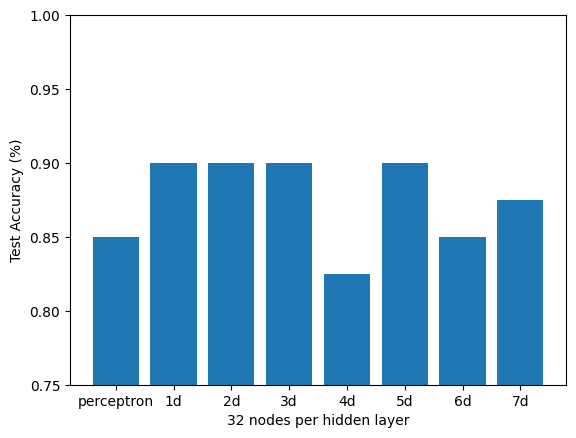

In [ ]:
import matplotlib.pyplot as plt
modelNames.insert(0, 'perceptron')
scores.insert(0, p.score(X_test, y_test) )

plt.bar(modelNames,scores)
plt.ylim(0.75, 1.0)
plt.ylabel('Test Accuracy (%)') 
plt.xlabel(str(NODES_PER_HIDDEN_LAYER) + " nodes per hidden layer")
plt.show()

In [ ]:
probabilities = [model.predict(X_test) for model in models]

# Convert probabilities to class labels
predicted_labels = [np.argmax(prob, axis=1) for prob in probabilities]

# Assuming y_test is your actual labels
# Convert y_test to class labels if it's not already in that format
# This step depends on how y_test is structured. If it's one-hot encoded, you might need to use np.argmax(y_test, axis=1)

# Print predicted and actual labels for each model
for i, labels in enumerate(predicted_labels):
    print(f"Model {i+1} Predicted Labels: {labels}")
    print(f"Actual Labels: {y_test}")

2/2 [==============================] - 0s 3ms/step
Model 1 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 2 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 3 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 4 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Labels: [0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0]
Model 5 Predicted Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
Actual Label